# Univariate Analysis
As mentioned in my previous article [Introduction to Univariate, Bivariate and Multivariate Analysis](https://medium.com/analytics-vidhya/univariate-bivariate-and-multivariate-analysis-8b4fc3d8202c), this article will dive a bit deeper into the different analysis. We will use a Kaggle dataset ([Rain in Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv) to conduct our analysis. 
### Univariate recap
Univariate analysis analyzes  only one variable. The most common methods to conduct univariate analysis is to check for central tendency numerical variables and frequency distribution for categorical variables. 
### To get started
- download the dataset
- import necessary packages
- read in the file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# changing display options to increase the number of columns and rows viewable
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)

In [3]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Using .info() method, we can see the counts and the datatypes of each fature.

This dataset consiist of 145,460 observations (rows) and 23 features (columns).

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null obje

We see that the date column and location column have all 145,460 observations but rest of the features are missing observations. Depending on the goal of the analysis and the domaine knowledge you possess, you will have to deal with the null values. For the purpose of this article, I will convert the null values to 0.

A quiick way to get a glimps of the dataset is to use the [.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) method in pandas.

This method provides a summary on all the numerical data within the dataset. 
As you can see below, it shows the count, mean, standard deviation, minimum value, 25%, 50% and 75% percentile and lastly the maxium value of each feature. 

In [5]:
df.describe() #before replacing all null values to 0

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [8]:
df.fillna(0, inplace = True) 
# inplace = True replaces all null values in the same dataset.
# by default, to prevent errors, pandas will create a copy of the dataset where 
# all null values are filled if inplace=True is not speficied.


Now lets check for null values again. 

In [10]:
df.info()
# there are no more null values in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          145460 non-null float64
MaxTemp          145460 non-null float64
Rainfall         145460 non-null float64
Evaporation      145460 non-null float64
Sunshine         145460 non-null float64
WindGustDir      145460 non-null object
WindGustSpeed    145460 non-null float64
WindDir9am       145460 non-null object
WindDir3pm       145460 non-null object
WindSpeed9am     145460 non-null float64
WindSpeed3pm     145460 non-null float64
Humidity9am      145460 non-null float64
Humidity3pm      145460 non-null float64
Pressure9am      145460 non-null float64
Pressure3pm      145460 non-null float64
Cloud9am         145460 non-null float64
Cloud3pm         145460 non-null float64
Temp9am          145460 non-null float64
Temp3pm          145460 non-null float64
RainToday        145460 non-null 

Lets say I am only interested in Albury and want to know the minimum and maximum temperature there. 
First I would need to isolate all observations for Albury and then do my analysis. 

In [21]:
# this function checks for "Albury" in the "Location" column and returns a boolean. 
df["Location"]=="Albury" 
# this function returns a dataframe where the the "Location" is "Albury". 
df[df["Location"]=="Albury"]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,0.0,0.0,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,0.0,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,0.0,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,0.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,0.0,0.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,2017-06-21,Albury,1.2,15.2,0.4,0.0,0.0,ENE,15.0,0,NNE,0.0,2.0,100.0,62.0,1029.4,1026.7,8.0,0.0,2.9,14.3,No,No
3036,2017-06-22,Albury,0.8,13.4,0.0,0.0,0.0,W,17.0,S,0,6.0,0.0,100.0,66.0,1029.4,1025.9,8.0,1.0,3.6,13.3,No,No
3037,2017-06-23,Albury,1.1,11.9,0.0,0.0,0.0,SE,44.0,SSE,SSE,9.0,2.0,100.0,81.0,1022.3,1017.7,8.0,1.0,2.7,10.2,No,No
3038,2017-06-24,Albury,1.1,14.1,0.2,0.0,0.0,WSW,28.0,SW,W,4.0,15.0,100.0,49.0,1018.8,1017.2,7.0,6.0,3.9,13.1,No,No


I will now assign a variable named albury_df to be the dataframe that consist only of Albury city 

In [22]:
albury_df = df[df["Location"]=="Albury"]

As mentioned before, we are only interested in the lowest and the highest temperature recorded in Albury. 

In [32]:
lowest = albury_df["MinTemp"].min()
highest = albury_df["MaxTemp"].max()

print(lowest, highest)

-2.8 44.8


But you could also use the .describe() method to see a lot more information on the features.

You can see the lowest and highest values for MinTemp and MaxTemp. 

In [30]:
albury_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3040.000000,3040.000000,3040.000000,3040.0,3040.0,3040.000000,3040.000000,3040.000000,3040.000000,3040.000000,3040.000000,3040.000000,3040.000000,3040.000000,3040.000000,3040.000000
mean,9.496118,22.558947,1.895855,0.0,0.0,32.630263,8.186842,14.330921,73.851316,47.743421,1016.694671,1013.087697,2.709868,2.537829,14.318618,21.317533
std,6.085466,7.898712,6.203009,0.0,0.0,13.726689,6.738130,7.241182,17.869134,19.942711,41.923515,52.529959,3.520639,3.323595,6.408048,7.588936
min,-2.800000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.700000,15.800000,0.000000,0.0,0.0,22.000000,4.000000,9.000000,60.000000,32.000000,1013.375000,1010.600000,0.000000,0.000000,9.200000,14.800000
50%,9.100000,21.900000,0.000000,0.0,0.0,31.000000,7.000000,13.000000,76.000000,47.000000,1018.400000,1015.600000,0.000000,0.000000,14.050000,20.600000
75%,14.300000,28.900000,0.400000,0.0,0.0,41.000000,11.000000,19.000000,88.000000,60.000000,1023.300000,1020.500000,7.000000,6.000000,19.300000,27.200000
max,28.300000,44.800000,104.200000,0.0,0.0,107.000000,37.000000,50.000000,100.000000,100.000000,1039.900000,1036.100000,8.000000,8.000000,34.500000,43.400000


However, if you are only interested in seeing the spread or frequency of the MinTemp, you could use a bargraph, boxplots, or violinplot or a distribution plot. I personally favor violinplot, but it is not used widely. I wrote an article on [why violinplot should be used more](https://medium.com/analytics-vidhya/a-violin-is-better-f7068129a14)

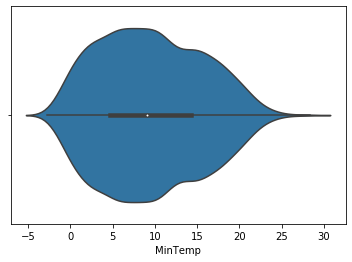

In [49]:
sns.violinplot(x="MinTemp", data=albury_df)

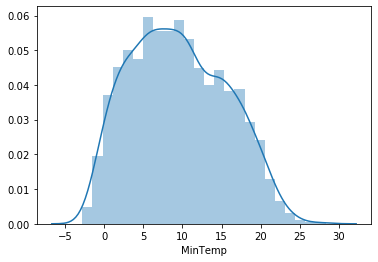

In [76]:
sns.distplot(albury_df["MinTemp"])
# here you can see the distribution of the MinTemp.
# y-axis represents the percentage 

Now lets take a look at a categorical variable. We will look at the WindGustDir. Here we will use the Countplot, since there are a limited number of directions. 

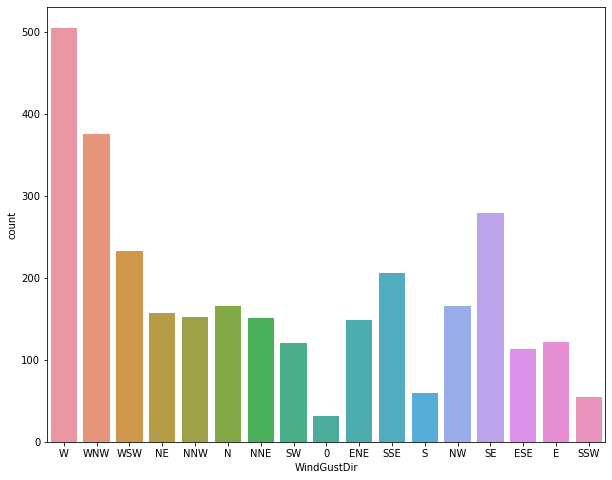

In [80]:
fig, ax = plt.subplots(figsize = (10,8))
sns.countplot(x="WindGustDir", data=albury_df)

There are ways to prettify this to make it more presentable. The starter code can be found on [this article](https://dorjeys3.medium.com/matplotlib-quick-and-pretty-enough-to-get-you-started-5f425b55132f).

Another method to simply see the distribution in numbers would be to create a pivot table in pandas. 


In [83]:
duplicates = albury_df.pivot_table(index= ["WindGustDir"], aggfunc="size")
print(duplicates)

WindGustDir
0       32
E      122
ENE    149
ESE    113
N      165
NE     157
NNE    151
NNW    152
NW     166
S       60
SE     279
SSE    206
SSW     55
SW     120
W      505
WNW    375
WSW    233
dtype: int64


As mentioned in the [Introduction to Univariate, Bivariate and Multivariate Analysis](https://medium.com/analytics-vidhya/univariate-bivariate-and-multivariate-analysis-8b4fc3d8202c), the Univariate analysis is the simplest of the three. It provides basic information but crucial information on one feature. Just by looking at the above table and figure, we are certain that majority of the gust is coming from the Westward direction. We also know the lowest and hightest temperature recorded in the city of Albury. 

In the next article, we will be looking at Bivariate Analysis and diving deeper into the different methods that can be used to conduct the analysis. 